# Analysis of the Energy Predictor Shootout Data set

In [3]:
#Loading the necessary modules
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15.0,15.0]
import sys
!{sys.executable} -m pip install xlrd

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#Loading the data
df = pd.read_excel("buildingsDoc.xlsx")
#Scaling the data
scaler = MinMaxScaler()
df[['TEMP','HUMID','SOLAR','WIND','WBE','WBCW','WBHW']] = scaler.fit_transform(df[['TEMP',
                                                                                   'HUMID','SOLAR','WIND','WBE','WBCW','WBHW']])
#Look at the top five rows of the scaled data
print (df.head())

   MONTH  DAY  YEAR  HOUR      TEMP     HUMID     SOLAR      WIND       WBE  \
0      9    1    89   200  0.818369  0.828829  0.000682  0.289954  0.196048   
1      9    1    89   300  0.805986  0.842342  0.000682  0.302131  0.197643   
2      9    1    89   400  0.795666  0.873874  0.000682  0.293760  0.197015   
3      9    1    89   500  0.788442  0.887387  0.000780  0.231355  0.193585   
4      9    1    89   600  0.787410  0.896396  0.000780  0.216134  0.199301   

     WBCW      WBHW  
0  0.9000  0.063492  
1  0.8875  0.079365  
2  0.8875  0.079365  
3  0.8875  0.095238  
4  0.8750  0.095238  


In [5]:
#See some statistics of the data
print (df.describe())

             MONTH          DAY         YEAR         HOUR         TEMP  \
count  4208.000000  4208.000000  4208.000000  4208.000000  4208.000000   
mean      7.740019    15.288023    89.304658  1148.859316     0.602266   
std       4.295303     8.675692     0.460317   692.208415     0.167558   
min       1.000000     1.000000    89.000000     0.000000     0.000000   
25%       2.000000     8.000000    89.000000   500.000000     0.482972   
50%      10.000000    15.000000    89.000000  1100.000000     0.613003   
75%      11.000000    22.000000    90.000000  1700.000000     0.723426   
max      12.000000    31.000000    90.000000  2300.000000     1.000000   

             HUMID        SOLAR         WIND          WBE         WBCW  \
count  4208.000000  4208.000000  4208.000000  4208.000000  4208.000000   
mean      0.318349     0.145722     0.251738     0.445195     0.627308   
std       0.225176     0.232631     0.133731     0.244068     0.142463   
min       0.000000     0.000000     0

In [6]:
#Creating the input and output data
X_predictors = df[['TEMP','HUMID','SOLAR','WIND']].values
Y_WBE = df[['WBE']].values
Y_WBCW = df[['WBCW']].values

Y_WBHW = df[['WBHW']].values

#Creating training and test data
Xtrain1 = X_predictors[:2927,:]
Xtest1 = X_predictors[2927:,:]
YWBE_train1 = Y_WBE[:2927,:]
YWBCW_train1 = Y_WBCW[:2927,:]
YWBHW_train1 = Y_WBHW[:2927,:]
YWBE_test1 = Y_WBE[2927:,:]
YWBCW_test1 = Y_WBCW[2927:,:]
YWBHW_test1 = Y_WBHW[2927:,:]

The number of clusters =
3
The silhouette score is
0.4013983845122774


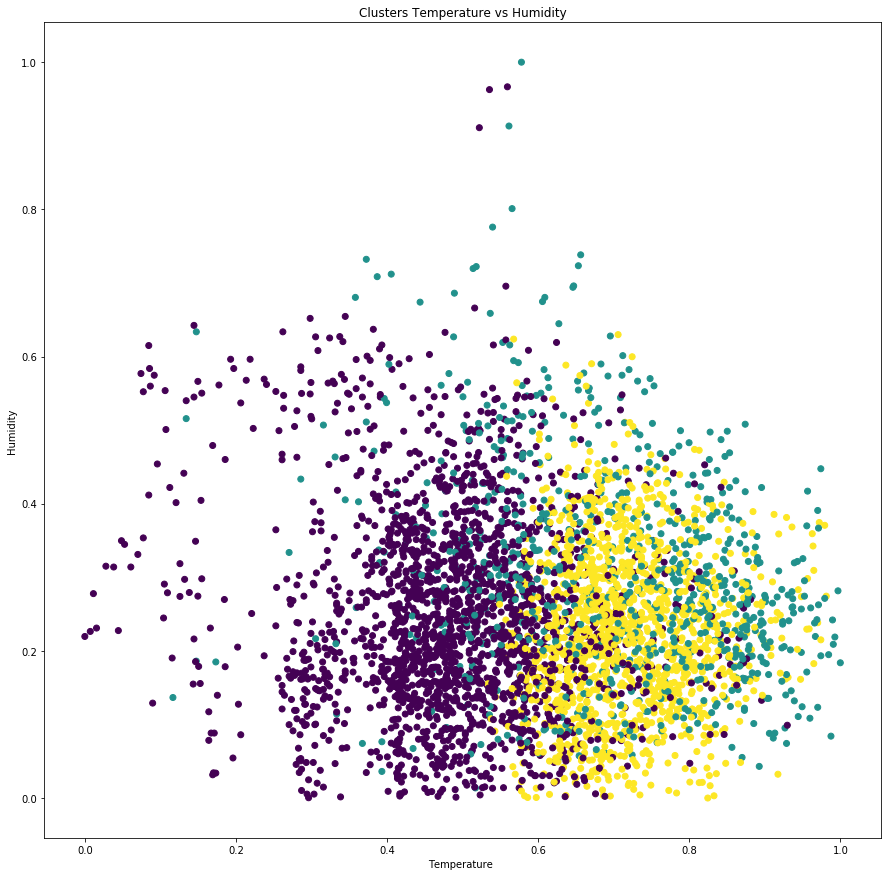

In [19]:
#Showing K means on the problem
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#set the number of clusters
NumberOfClusters = 3
print ("The number of clusters =")
print (NumberOfClusters)
kmeans = KMeans(n_clusters=NumberOfClusters, random_state=0).fit(X_predictors)
labels = kmeans.labels_
score = silhouette_score(X_predictors, labels)
print("The silhouette score is")
print (score)
#since it is difficult to visualize data higher than 2 dimensions in 
#python, let's see how the points are labeled with respect to 
#two dimensions(In this case let's use TEMP and Hummidity)
plt.scatter(X_predictors[:,0],X_predictors[:,3],c=labels)
plt.title('Clusters Temperature vs Humidity')
plt.xlabel('Temperature ')
plt.ylabel('Humidity')
plt.show()

In [8]:
#Performing linear regression for each mode of energy conusmption
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
regr3 = linear_model.LinearRegression()
regr1.fit(Xtrain1, YWBE_train1)
regr2.fit(Xtrain1, YWBCW_train1)
regr3.fit(Xtrain1, YWBHW_train1)
YWBE_pred1 = regr1.predict(Xtest1)
YWBCW_pred1 = regr1.predict(Xtest1)
YWBHW_pred1 = regr1.predict(Xtest1)

In [9]:
# The mean squared error
print("WBE Mean squared error: %.2f"
      % mean_squared_error(YWBE_test1, YWBE_pred1))
# Explained variance score: 1 is perfect prediction
print('WBE Variance score: %.2f' % r2_score(YWBE_test1, YWBE_pred1))

# The mean squared error
print("WBCW Mean squared error: %.2f"
      % mean_squared_error(YWBCW_test1, YWBE_pred1))
# Explained variance score: 1 is perfect prediction
print('WBCW Variance score: %.2f' % r2_score(YWBCW_test1, YWBCW_pred1))

# The mean squared error
print("WBHW Mean squared error: %.2f"
      % mean_squared_error(YWBHW_test1, YWBHW_pred1))
# Explained variance score: 1 is perfect prediction
print('WBHW Variance score: %.2f' % r2_score(YWBHW_test1, YWBHW_pred1))

WBE Mean squared error: 0.03
WBE Variance score: 0.30
WBCW Mean squared error: 0.05
WBCW Variance score: -3.06
WBHW Mean squared error: 0.05
WBHW Variance score: -1.71


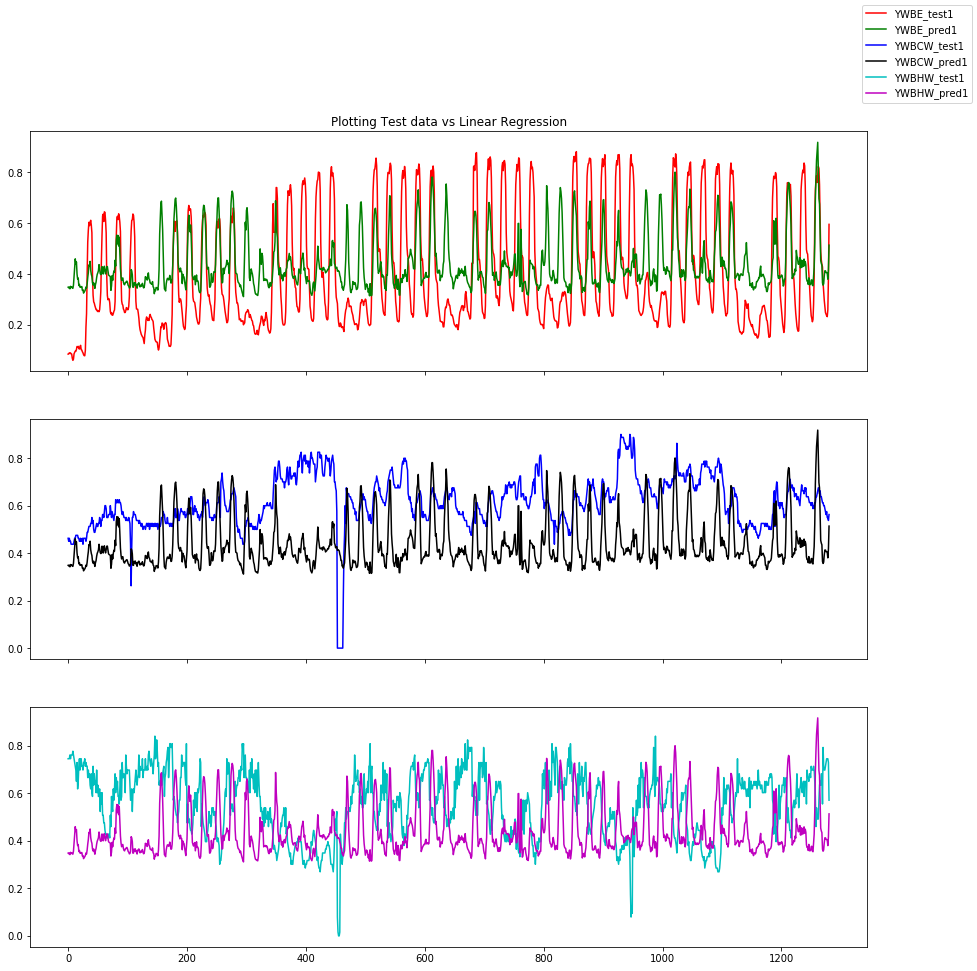

In [16]:
#Not a very good prediction.
#let's see the plots of the data 
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(YWBE_test1,'r',label='YWBE_test1')
axarr[0].plot(YWBE_pred1,'g',label='YWBE_pred1')
axarr[0].set_title('Plotting Test data vs Linear Regression')
axarr[1].plot(YWBCW_test1,'b',label='YWBCW_test1')
axarr[1].plot(YWBCW_pred1,'k',label='YWBCW_pred1')
axarr[2].plot(YWBHW_test1,'c',label='YWBHW_test1')
axarr[2].plot(YWBHW_pred1,'m',label='YWBHW_pred1')
f.legend()
plt.show()

In [17]:
#The linear regression is not able to follow the general trend
#Let's try the Support Vector Regresson on the problem

In [18]:
#Using Support Vector Regression
from sklearn.svm import SVR
#Performing linear regression
regr1 = SVR(C=3.0, epsilon=0.2)
regr2 = SVR(C=3.0, epsilon=0.2)
regr3 = SVR(C=3.0, epsilon=0.2)
regr1.fit(Xtrain1, YWBE_train1)
regr2.fit(Xtrain1, YWBCW_train1)
regr3.fit(Xtrain1, YWBHW_train1)
YWBE_pred1 = regr1.predict(Xtest1)
YWBCW_pred1 = regr1.predict(Xtest1)
YWBHW_pred1 = regr1.predict(Xtest1)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# The mean squared error
print("WBE Mean squared error: %.2f"
      % mean_squared_error(YWBE_test1, YWBE_pred1))
# Explained variance score: 1 is perfect prediction
print('WBE Variance score: %.2f' % r2_score(YWBE_test1, YWBE_pred1))

# The mean squared error
print("WBCW Mean squared error: %.2f"
      % mean_squared_error(YWBCW_test1, YWBE_pred1))
# Explained variance score: 1 is perfect prediction
print('WBCW Variance score: %.2f' % r2_score(YWBCW_test1, YWBCW_pred1))

# The mean squared error
print("WBHW Mean squared error: %.2f"
      % mean_squared_error(YWBHW_test1, YWBHW_pred1))
# Explained variance score: 1 is perfect prediction
print('WBHW Variance score: %.2f' % r2_score(YWBHW_test1, YWBHW_pred1))

WBE Mean squared error: 0.03
WBE Variance score: 0.34
WBCW Mean squared error: 0.04
WBCW Variance score: -2.35
WBHW Mean squared error: 0.05
WBHW Variance score: -1.86


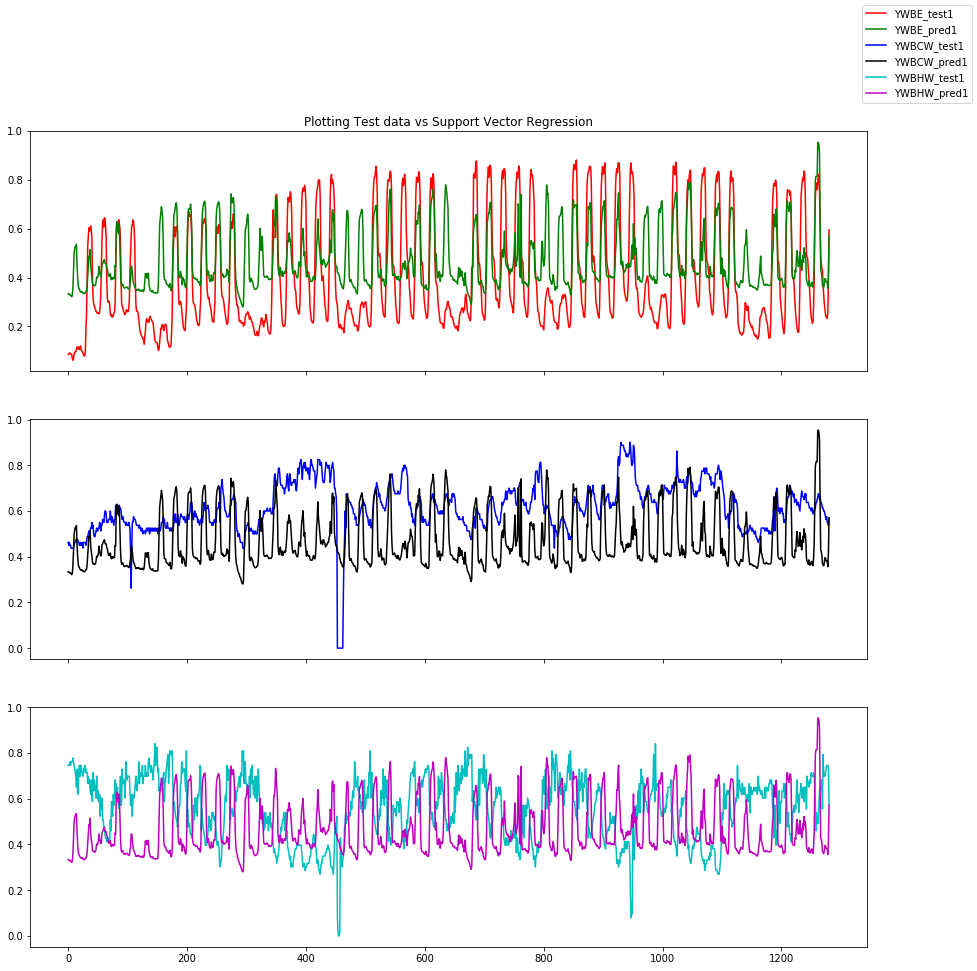

In [20]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(YWBE_test1,'r',label='YWBE_test1')
axarr[0].plot(YWBE_pred1,'g',label='YWBE_pred1')
axarr[0].set_title('Plotting Test data vs Support Vector Regression')
axarr[1].plot(YWBCW_test1,'b',label='YWBCW_test1')
axarr[1].plot(YWBCW_pred1,'k',label='YWBCW_pred1')
axarr[2].plot(YWBHW_test1,'c',label='YWBHW_test1')
axarr[2].plot(YWBHW_pred1,'m',label='YWBHW_pred1')
f.legend()
plt.show()

In [21]:
#Not much improvement except for the increase in explained variance
#We need to perform a complete enrgy forecast problem on the data set
#to increase prediction accuracy. The energy data from the previous hour 
#is added as an input to predict the current conditions

In [22]:
#Let's start from loading the data and this time we make a few changes to the input

In [23]:
#Converting the data from a time series problem to a  supervised learning problem
#We add the energy conumsption form the previous hour as input to predict the energy
#consumption at the current hour.
df1 = pd.read_excel("buildingsDoc.xlsx")
energyInput = pd.DataFrame()#Creating empty dataframe to store previous time point enregy values
energyInput[['iWBE','iWBCW','iWBHW']] = df1[['WBE','WBCW','WBHW']].copy()
#Shifting the energyInput dataframe 1 time step forward to enable prediction 
energyInput = energyInput.shift(1)
#removing the first row from the data as it is NaN now 
energyInput = energyInput.iloc[1:]
#removing the first row from the original dataframe as it has no corrsponding
#energy input from a previous timepoint
df1 = df1.iloc[1:]
#Concatenating the two data frames to create an augmented set of inputs
df = pd.concat([energyInput,df1],axis=1)
print (df.head())

     iWBE  iWBCW  iWBHW  MONTH  DAY  YEAR  HOUR  TEMP   HUMID  SOLAR  WIND  \
1  496.07    7.2    0.4      9    1    89   300  80.7  0.0187    0.0  7.94   
2  497.06    7.1    0.5      9    1    89   400  79.7  0.0194    0.0  7.72   
3  496.67    7.1    0.5      9    1    89   500  79.0  0.0197    0.1  6.08   
4  494.54    7.1    0.6      9    1    89   600  78.9  0.0199    0.1  5.68   
5  498.09    7.0    0.6      9    1    89   700  78.5  0.0202    0.5  3.87   

      WBE  WBCW  WBHW  
1  497.06   7.1   0.5  
2  496.67   7.1   0.5  
3  494.54   7.1   0.6  
4  498.09   7.0   0.6  
5  516.96   7.0   0.6  


In [24]:
#Now we scale the data and do subsequent analysis as we did with the Support vector Regression
scaler = MinMaxScaler()
df[['iWBE','iWBCW','iWBHW','TEMP','HUMID','SOLAR','WIND','WBE','WBCW','WBHW']] = scaler.fit_transform(df[['iWBE','iWBCW','iWBHW',
	'TEMP','HUMID','SOLAR','WIND','WBE','WBCW','WBHW']])
#print (df.head())
#print (df.describe())
X_predictorsWBE = df[['iWBE','TEMP','HUMID','SOLAR','WIND']].values
X_predictorsWBCW = df[['iWBCW','TEMP','HUMID','SOLAR','WIND']].values
X_predictorsWBHW = df[['iWBHW','TEMP','HUMID','SOLAR','WIND']].values
Y_WBE = df[['WBE']].values
Y_WBCW = df[['WBCW']].values
Y_WBHW = df[['WBHW']].values

In [25]:
#Creating training and test data
Xtrain1WBE = X_predictorsWBE[:2927,:]
Xtest1WBE = X_predictorsWBE[2927:,:]
Xtrain1WBCW = X_predictorsWBCW[:2927,:]
Xtest1WBCW = X_predictorsWBCW[2927:,:]
Xtrain1WBHW = X_predictorsWBHW[:2927,:]
Xtest1WBHW = X_predictorsWBHW[2927:,:]
YWBE_train1 = Y_WBE[:2927,:]
YWBCW_train1 = Y_WBCW[:2927,:]
YWBHW_train1 = Y_WBHW[:2927,:]
YWBE_test1 = Y_WBE[2927:,:]
YWBCW_test1 = Y_WBCW[2927:,:]
YWBHW_test1 = Y_WBHW[2927:,:]

In [26]:
#Using Support Vector Regression
from sklearn.svm import SVR
#Performing linear regression
regr1 = SVR(C=1.0, epsilon=0.2)
regr2 = SVR(C=1.0, epsilon=0.2)
regr3 = SVR(C=1.0, epsilon=0.2)
regr1.fit(Xtrain1WBE, YWBE_train1)
regr2.fit(Xtrain1WBCW, YWBCW_train1)
regr3.fit(Xtrain1WBHW, YWBHW_train1)
YWBE_pred1 = regr1.predict(Xtest1WBE)
YWBCW_pred1 = regr1.predict(Xtest1WBCW)
YWBHW_pred1 = regr1.predict(Xtest1WBHW)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# The mean squared error
print("WBE Mean squared error: %.2f"
      % mean_squared_error(YWBE_test1, YWBE_pred1))
# Explained variance score: 1 is perfect prediction
print('WBE Variance score: %.2f' % r2_score(YWBE_test1, YWBE_pred1))

# The mean squared error
print("WBCW Mean squared error: %.2f"
      % mean_squared_error(YWBCW_test1, YWBE_pred1))
# Explained variance score: 1 is perfect prediction
print('WBCW Variance score: %.2f' % r2_score(YWBCW_test1, YWBCW_pred1))

# The mean squared error
print("WBHW Mean squared error: %.2f"
      % mean_squared_error(YWBHW_test1, YWBHW_pred1))
# Explained variance score: 1 is perfect prediction
print('WBHW Variance score: %.2f' % r2_score(YWBHW_test1, YWBHW_pred1))

WBE Mean squared error: 0.01
WBE Variance score: 0.70
WBCW Mean squared error: 0.03
WBCW Variance score: 0.81
WBHW Mean squared error: 0.01
WBHW Variance score: 0.66


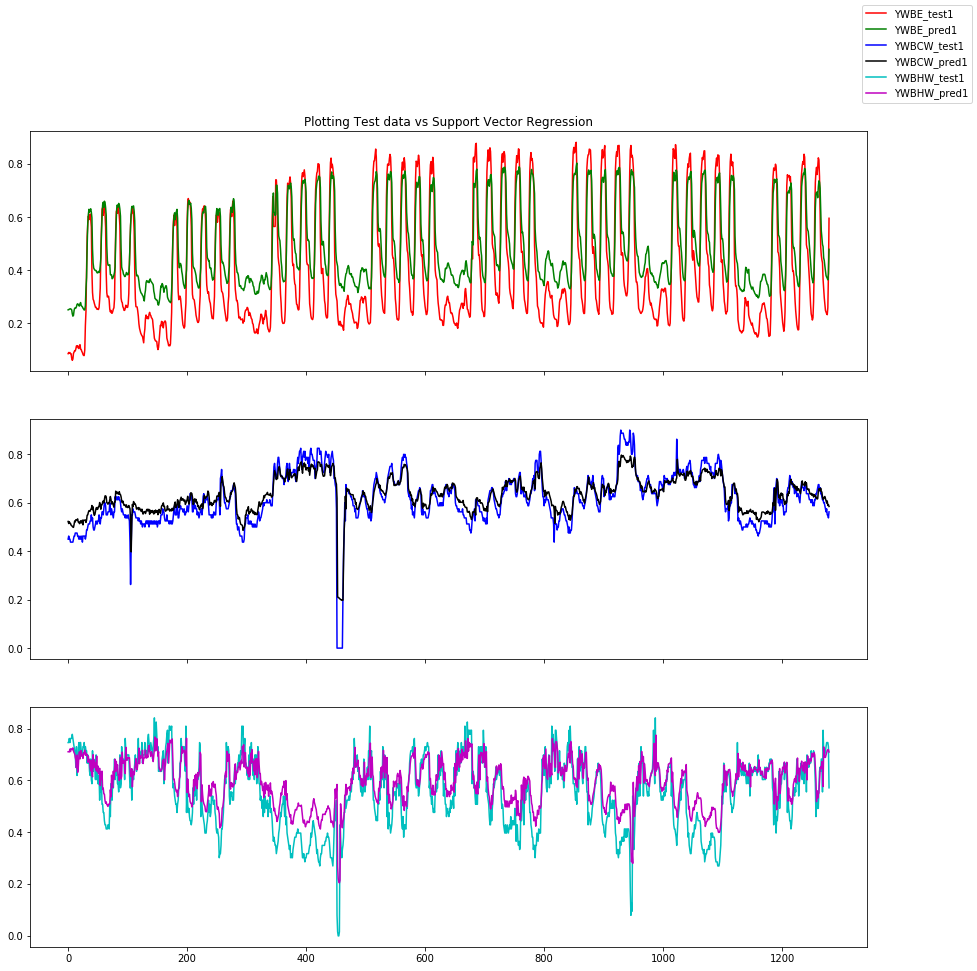

In [28]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(YWBE_test1,'r',label='YWBE_test1')
axarr[0].plot(YWBE_pred1,'g',label='YWBE_pred1')
axarr[0].set_title('Plotting Test data vs Support Vector Regression')
axarr[1].plot(YWBCW_test1,'b',label='YWBCW_test1')
axarr[1].plot(YWBCW_pred1,'k',label='YWBCW_pred1')
axarr[2].plot(YWBHW_test1,'c',label='YWBHW_test1')
axarr[2].plot(YWBHW_pred1,'m',label='YWBHW_pred1')
f.legend()
plt.show()

In [ ]:
#We definitely achieved a better accuracy in terms of forecasting energy conusmption
#Possible alternatives:
"""
Use a similar approach to use past energy as well as past environmental data to predict 
current energy consumption.
Make the time series data stationary and then do an energy forecasting problem.
The increase in accuracy is well explained by the increase in the coefficient of variance. 
The accuracy increases because the SVR predictor has a better/heuristic guess 
as to where to start when performing the convex optimization problem when looking for the
optimal hyperplane. The heuristic in this case is the energy consumption in the previous time
step.
"""